# The SARS-CoV-2 (Covid-19) epidemic
Getting the Data: (and NOT caching it as the data source is updated and so reevaluating this cell will give the latest results)

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

Check that we did not misstype some urls:

In [3]:
for x in confirmed, recovered, deaths:
    print(x.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20   ...     5/10/20  5/11/20  5/12/20  5/13/20  \
0        0        0        0   ...        4402     4687     4963     5226   
1        0        0        0   ...         868      872      876      880   
2        0        0        0   ...        5723     5891     6067     6253   
3        0        0        0   ...         755      755      758      760   
4        0        0        0   ...          45       45       45       45   

   5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20 

Looks good so lets draw the "[...] *graph showing the evolution of the cumulative number of cases over time for: Belgium, China (all provinces except Hong Kong), China, Hong-Kong, France except Dom/Tom, Germany, Iran, Italy, Japan, Korea South, Netherlands without the colonies, Portugal, Spain, United Kingdom without the colonies, US.*" as  proposed in the task

Unfortunately we cannot take the data as is as there are some special cases:

In [4]:
confirmed[confirmed["Country/Region"] == "France"]

Province/State Country/Region      Lat      Long  1/22/20  \
107              French Guiana         France   3.9339  -53.1258        0   
108           French Polynesia         France -17.6797  149.4068        0   
109                 Guadeloupe         France  16.2500  -61.5833        0   
110                    Mayotte         France -12.8275   45.1662        0   
111              New Caledonia         France -20.9043  165.6180        0   
112                    Reunion         France -21.1351   55.2471        0   
113           Saint Barthelemy         France  17.9000  -62.8333        0   
114                  St Martin         France  18.0708  -63.0501        0   
115                 Martinique         France  14.6415  -61.0242        0   
116                        NaN         France  46.2276    2.2137        0   
258  Saint Pierre and Miquelon         France  46.8852  -56.3159        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20   ...     5/10/20  5/11/20  \
107        0        0        0        0        0   ...         144      144   
108        0        0        0        0        0   ...          60       60   
109        0        0        0        0        0   ...         154      154   
110        0        0        0        0        0   ...        1023     1023   
111        0        0        0        0        0   ...          18       18   
112        0        0        0        0        0   ...         436      436   
113        0        0        0        0        0   ...           6        6   
114        0        0        0        0        0   ...          39       39   
115        0        0        0        0        0   ...         186      187   
116        0        2        3        3        3   ...      175027   175479   
258        0        0        0        0        0   ...           1        1   

     5/12/20  5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
107      144      153      164      189      197      197      210      218  
108       60       60       60       60       60       60       60       60  
109      155      155      155      155      155      155      155      155  
110     1095     1143     1210     1210     1312     1342     1370     1370  
111       18       18       18       18       18       18       18       18  
112      437      439      440      441      443      443      446      446  
113        6        6        6        6        6        6        6        6  
114       39       39       39       39       39       39       39       39  
115      187      189      189      192      192      192      192      192  
116   176207   175981   176712   177319   177207   177240   177554   178428  
258        1        1        1        1        1        1        1        1  

[11 rows x 123 columns]

In [5]:
confirmed[confirmed["Country/Region"] == "China"]

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
49           Anhui          China  31.8257  117.2264        1        9   
50         Beijing          China  40.1824  116.4142       14       22   
51       Chongqing          China  30.0572  107.8740        6        9   
52          Fujian          China  26.0789  117.9874        1        5   
53           Gansu          China  37.8099  101.0583        0        2   
54       Guangdong          China  23.3417  113.4244       26       32   
55         Guangxi          China  23.8298  108.7881        2        5   
56         Guizhou          China  26.8154  106.8748        1        3   
57          Hainan          China  19.1959  109.7453        4        5   
58           Hebei          China  39.5490  116.1306        1        1   
59    Heilongjiang          China  47.8620  127.7615        0        2   
60           Henan          China  33.8820  113.6140        5        5   
61       Hong Kong          China  22.3000  114.2000        0        2   
62           Hubei          China  30.9756  112.2707      444      444   
63           Hunan          China  27.6104  111.7088        4        9   
64  Inner Mongolia          China  44.0935  113.9448        0        0   
65         Jiangsu          China  32.9711  119.4550        1        5   
66         Jiangxi          China  27.6140  115.7221        2        7   
67           Jilin          China  43.6661  126.1923        0        1   
68        Liaoning          China  41.2956  122.6085        2        3   
69           Macau          China  22.1667  113.5500        1        2   
70         Ningxia          China  37.2692  106.1655        1        1   
71         Qinghai          China  35.7452   95.9956        0        0   
72         Shaanxi          China  35.1917  108.8701        0        3   
73        Shandong          China  36.3427  118.1498        2        6   
74        Shanghai          China  31.2020  121.4491        9       16   
75          Shanxi          China  37.5777  112.2922        1        1   
76         Sichuan          China  30.6171  102.7103        5        8   
77         Tianjin          China  39.3054  117.3230        4        4   
78           Tibet          China  31.6927   88.0924        0        0   
79        Xinjiang          China  41.1129   85.2401        0        2   
80          Yunnan          China  24.9740  101.4870        1        2   
81        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20   ...     5/10/20  5/11/20  5/12/20  \
49       15       39       60       70   ...         991      991      991   
50       36       41       68       80   ...         593      593      593   
51       27       57       75      110   ...         579      579      579   
52       10       18       35       59   ...         356      356      356   
53        2        4        7       14   ...         139      139      139   
54       53       78      111      151   ...        1589     1589     1589   
55       23       23       36       46   ...         254      254      254   
56        3        4        5        7   ...         147      147      147   
57        8       19       22       33   ...         168      168      168   
58        2        8       13       18   ...         328      328      328   
59        4        9       15       21   ...         945      945      945   
60        9       32       83      128   ...        1276     1276     1276   
61        2        5        8        8   ...        1047     1047     1047   
62      549      761     1058     1423   ...       68134    68134    68134   
63       24       43       69      100   ...        1019     1019     1019   
64        1        7        7       11   ...         208      209      209   
65        9       18       33       47   ...         653      653      653   
66       18       18       36       72   ...         937      937      937   
67   

In [6]:
d = confirmed[confirmed["Country/Region"] == "China"]
agg_dict = {col: 'sum' for col in d.columns[4:]}
d.groupby(['Country/Region'],as_index=False).agg(agg_dict).T[1:]

0
1/22/20    548
1/23/20    643
1/24/20    920
1/25/20   1406
1/26/20   2075
1/27/20   2877
1/28/20   5509
1/29/20   6087
1/30/20   8141
1/31/20   9802
2/1/20   11891
2/2/20   16630
2/3/20   19716
2/4/20   23707
2/5/20   27440
2/6/20   30587
2/7/20   34110
2/8/20   36814
2/9/20   39829
2/10/20  42354
2/11/20  44386
2/12/20  44759
2/13/20  59895
2/14/20  66358
2/15/20  68413
2/16/20  70513
2/17/20  72434
2/18/20  74211
2/19/20  74619
2/20/20  75077
...        ...
4/20/20  83817
4/21/20  83853
4/22/20  83868
4/23/20  83884
4/24/20  83899
4/25/20  83909
4/26/20  83912
4/27/20  83918
4/28/20  83940
4/29/20  83944
4/30/20  83956
5/1/20   83959
5/2/20   83959
5/3/20   83964
5/4/20   83966
5/5/20   83968
5/6/20   83970
5/7/20   83975
5/8/20   83976
5/9/20   83990
5/10/20  84010
5/11/20  84011
5/12/20  84018
5/13/20  84024
5/14/20  84029
5/15/20  84038
5/16/20  84044
5/17/20  84054
5/18/20  84063
5/19/20  84063

[119 rows x 1 columns]

In [7]:
confirmed[confirmed["Country/Region"] == "Netherlands"]

Province/State Country/Region      Lat     Long  \
166                             Aruba    Netherlands  12.5186 -70.0358   
167                           Curacao    Netherlands  12.1696 -68.9900   
168                      Sint Maarten    Netherlands  18.0425 -63.0548   
169                               NaN    Netherlands  52.1326   5.2913   
255  Bonaire, Sint Eustatius and Saba    Netherlands  12.1784 -68.2385   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20   ...     5/10/20  \
166        0        0        0        0        0        0   ...         101   
167        0        0        0        0        0        0   ...          16   
168        0        0        0        0        0        0   ...          76   
169        0        0        0        0        0        0   ...       42627   
255        0        0        0        0        0        0   ...           6   

     5/11/20  5/12/20  5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  \
166      101      101      101      101      101      101      101      101   
167       16       16       16       16       16       16       16       16   
168       76       76       76       76       76       77       77       77   
169    42788    42984    43211    43481    43681    43870    43995    44141   
255        6        6        6        6        6        6        6        6   

     5/19/20  
166      101  
167       16  
168       77  
169    44249  
255        6  

[5 rows x 123 columns]

In [8]:
for row in confirmed["Country/Region"]:
    if "Korea" in row:
        print(row)

Korea, South


Filtering like this leaves the question unanswered if line 116 contains the cases only for France except Dom/Tom or not.
As for other  countries there is no extra line for the country itself we assume for now The France line is France except Dom/Tom This is the same assumption that is also propsed in the task:
"*The data from China are organized by provinces and we have separated Hong-Kong, not in order the take a side in the tensions between the province and the Chinese state, but because this is how the data appear on the SCMP website. Overseas territories and other "colonial residues" are excluded from the data from France, the Netherlands, and the United Kingdom.*"

In [9]:
regions = ['Belgium', 'China (all provinces except Hong Kong)', 'China', 'Hong-Kong', 'France except Dom/Tom', 'Germany', 'Iran', 'Italy', 'Japan', 'Korea South', 'Netherlands without the colonies', 'Portugal', 'Spain', 'United Kingdom without the colonies', 'US']
to_plot = {}
for region in regions:
    region_name = region
    # Special cases:
    if "France" in region:
        region_name = "France" 
    if "Netherlands" in region:
        region_name = "Netherlands" 
    if "United Kingdom" in region:
        region_name = "United Kingdom"   
    if "Korea South" in region:
        region_name = "Korea, South"    
    if region == "Hong-Kong":
        d = confirmed[confirmed["Country/Region"] == "China"][confirmed['Province/State'] == "Hong Kong"]
        assert len(d) == 1
    else:
        d = confirmed[confirmed["Country/Region"] == region_name][confirmed['Province/State'].isnull()]
    
    if len(d) == 1:
        to_plot[region] = d.T[4:]
    else:
        # more special cases: China
        if region == "China":
            d = confirmed[confirmed["Country/Region"] == "China"]
            agg_dict = {col: 'sum' for col in d.columns[4:]}
            to_plot[region] = d.groupby(['Country/Region'],as_index=False).agg(agg_dict).T[1:]

        if region == "China (all provinces except Hong Kong)":
            d = confirmed[confirmed["Country/Region"] == "China"][confirmed['Province/State'] != "Hong Kong"]
            agg_dict = {col: 'sum' for col in d.columns[4:]}
            to_plot[region] = d.groupby(['Country/Region'],as_index=False).agg(agg_dict).T[1:]
            
    to_plot[region].index = pd.to_datetime(to_plot[region].index)
    col_name = to_plot[region].columns[0]
    to_plot[region] = to_plot[region].rename(columns={col_name: "confirmed cases"})
    
        
    
#print(to_plot)        
#print(len(to_plot) , len(regions))
assert len(to_plot) == len(regions)
#to_plot

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [10]:
tmp = to_plot["France except Dom/Tom"]

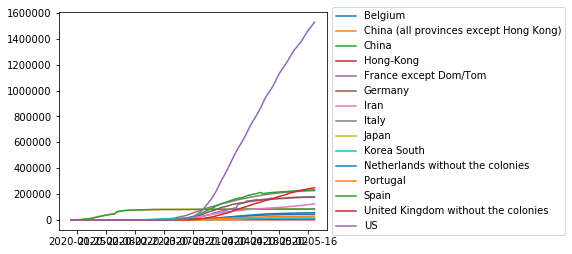

In [11]:
fig = plt.figure()
ax = plt.subplot(111)

for region, data in to_plot.items():
    ax.plot(data["confirmed cases"], label=region)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Now lets cut of the days where less than 150 cases are available:

In [12]:
to_plot_cut = {}
for region, data in to_plot.items():  # something is wrong here!
    cutpoint = -1    
    col = data.columns[0]    
    for i, val in enumerate(data["confirmed cases"]):
        #print(val)
        if val >= 150:
            cutpoint = i            
            break
    assert cutpoint != -1
#     print(cutpoint)
#     print("-------")
#     print(region)
#     print(to_plot[region][:])
#     print(",,,,")
#     print(data.iloc[cutpoint:cutpoint+5])
    to_plot_cut[region] = data.iloc[cutpoint:]  
to_plot_cut

{'Belgium':            confirmed cases
 2020-03-07             169
 2020-03-08             200
 2020-03-09             239
 2020-03-10             267
 2020-03-11             314
 2020-03-12             314
 2020-03-13             559
 2020-03-14             689
 2020-03-15             886
 2020-03-16            1058
 2020-03-17            1243
 2020-03-18            1486
 2020-03-19            1795
 2020-03-20            2257
 2020-03-21            2815
 2020-03-22            3401
 2020-03-23            3743
 2020-03-24            4269
 2020-03-25            4937
 2020-03-26            6235
 2020-03-27            7284
 2020-03-28            9134
 2020-03-29           10836
 2020-03-30           11899
 2020-03-31           12775
 2020-04-01           13964
 2020-04-02           15348
 2020-04-03           16770
 2020-04-04           18431
 2020-04-05           19691
 ...                    ...
 2020-04-20           39983
 2020-04-21           40956
 2020-04-22           41889
 2020-04-

And plot it

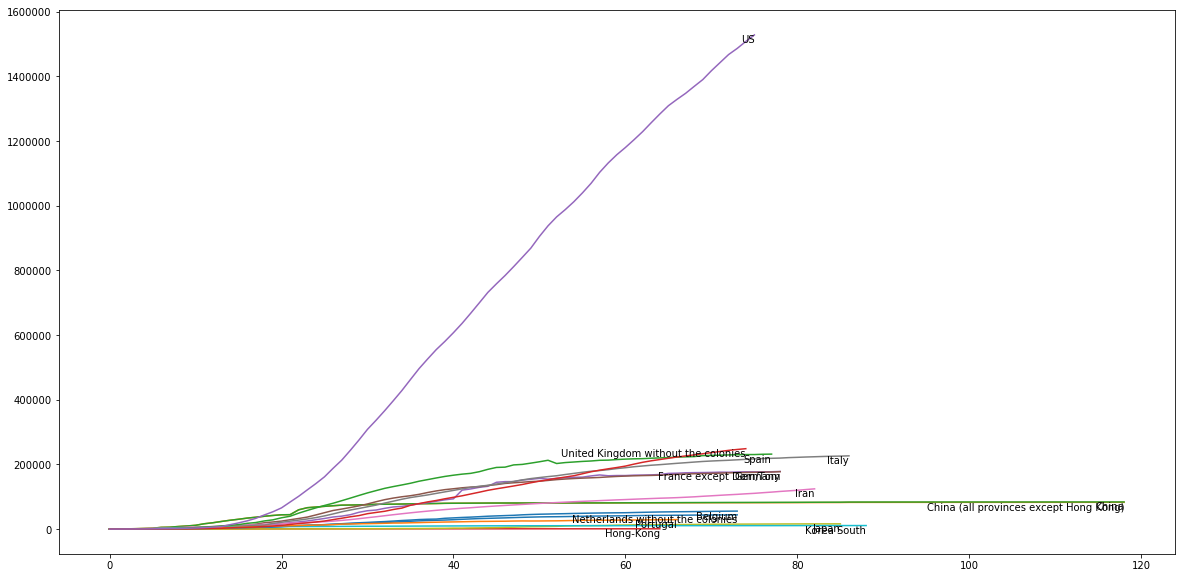

In [13]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)


for region, data in to_plot_cut.items():
    xs = np.arange(0,len(data["confirmed cases"]),1)
    ys = data["confirmed cases"][:]
    ax.plot(xs, ys, label=region)
    ax.annotate(region, xy=(xs[-1], ys[-1]),  xycoords='data',
            xytext=(xs[-1], ys[-1]), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
    
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width, box.height])

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



plt.show()

Its really hard to see who is who. So lets try with a logarithmic scale:

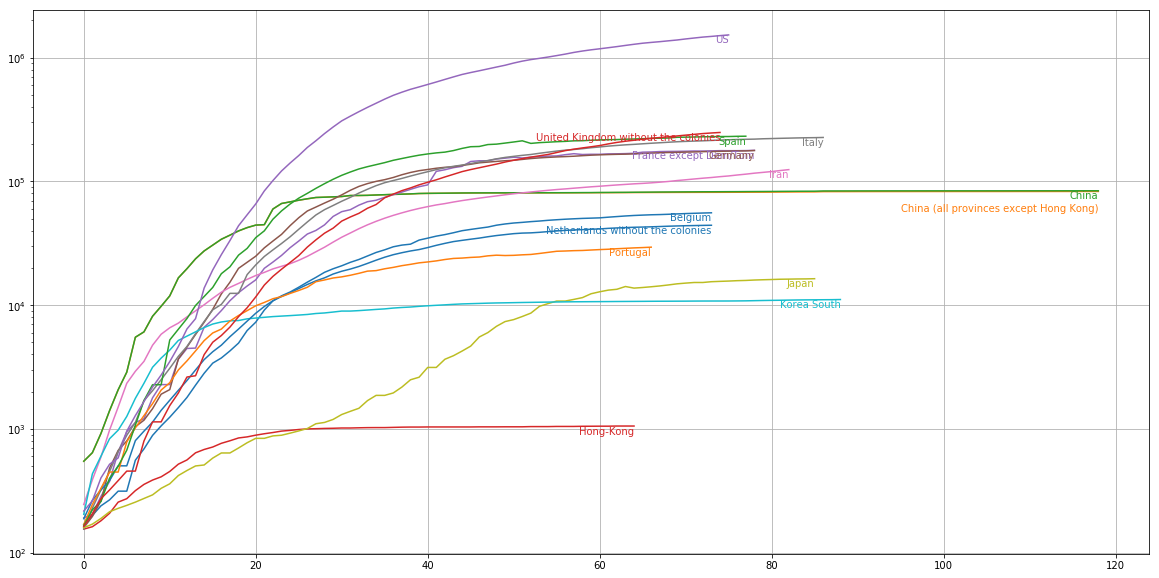

In [14]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)


for region, data in to_plot_cut.items():
    xs = np.arange(0,len(data["confirmed cases"]),1)
    ys = data["confirmed cases"][:]
    p = ax.plot(xs, ys, label=region)
    annotation_text = region
    if "except Hong Kong" in region:
        annotation_text = "\n"+annotation_text
    ax.annotate(annotation_text, xy=(xs[-1], ys[-1]),  xycoords='data',
            xytext=(xs[-1], ys[-1]), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=-0.05),
            horizontalalignment='right', verticalalignment='top', color = p[0].get_color()
            )

plt.grid()
plt.yscale("log")
plt.show()

Is there a problem with the spain curve? it seems to start very high?

In [15]:
for row in confirmed[confirmed["Country/Region"] == "Spain"].T[201]:
    print(row)

nan
Spain
40.0
-4.0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
6
13
15
32
45
84
120
165
222
259
400
500
673
1073
1695
2277
2277
5232
6391
7798
9942
11748
13910
17963
20410
25374
28768
35136
39885
49515
57786
65719
73235
80110
87956
95923
104118
112065
119199
126168
131646
136675
141942
148220
153222
158273
163027
166831
170099
172541
177644
184948
190839
191726
198674
200210
204178
208389
213024
202990
205905
207634
209465
210773
212917
213435
215216
216582
217466
218011
219329
220325
221447
222857
223578
224350
227436
228030
228691
229540
230183
230698
230698
231606
232037


There seems to be a problem...

In [16]:
to_plot_cut["Spain"]

confirmed cases
2020-03-03             165
2020-03-04             222
2020-03-05             259
2020-03-06             400
2020-03-07             500
2020-03-08             673
2020-03-09            1073
2020-03-10            1695
2020-03-11            2277
2020-03-12            2277
2020-03-13            5232
2020-03-14            6391
2020-03-15            7798
2020-03-16            9942
2020-03-17           11748
2020-03-18           13910
2020-03-19           17963
2020-03-20           20410
2020-03-21           25374
2020-03-22           28768
2020-03-23           35136
2020-03-24           39885
2020-03-25           49515
2020-03-26           57786
2020-03-27           65719
2020-03-28           73235
2020-03-29           80110
2020-03-30           87956
2020-03-31           95923
2020-04-01          104118
...                    ...
2020-04-20          200210
2020-04-21          204178
2020-04-22          208389
2020-04-23          213024
2020-04-24          202990
2020-04-25          205905
2020-04-26          207634
2020-04-27          209465
2020-04-28          210773
2020-04-29          212917
2020-04-30          213435
2020-05-01          215216
2020-05-02          216582
2020-05-03          217466
2020-05-04          218011
2020-05-05          219329
2020-05-06          220325
2020-05-07          221447
2020-05-08          222857
2020-05-09          223578
2020-05-10          224350
2020-05-11          227436
2020-05-12          228030
2020-05-13          228691
2020-05-14          229540
2020-05-15          230183
2020-05-16          230698
2020-05-17          230698
2020-05-18          231606
2020-05-19          232037

[78 rows x 1 columns]

Ok I see its the chinese curve which jsut got a very similar color

In [17]:
to_plot["China"]

confirmed cases
2020-01-22             548
2020-01-23             643
2020-01-24             920
2020-01-25            1406
2020-01-26            2075
2020-01-27            2877
2020-01-28            5509
2020-01-29            6087
2020-01-30            8141
2020-01-31            9802
2020-02-01           11891
2020-02-02           16630
2020-02-03           19716
2020-02-04           23707
2020-02-05           27440
2020-02-06           30587
2020-02-07           34110
2020-02-08           36814
2020-02-09           39829
2020-02-10           42354
2020-02-11           44386
2020-02-12           44759
2020-02-13           59895
2020-02-14           66358
2020-02-15           68413
2020-02-16           70513
2020-02-17           72434
2020-02-18           74211
2020-02-19           74619
2020-02-20           75077
...                    ...
2020-04-20           83817
2020-04-21           83853
2020-04-22           83868
2020-04-23           83884
2020-04-24           83899
2020-04-25           83909
2020-04-26           83912
2020-04-27           83918
2020-04-28           83940
2020-04-29           83944
2020-04-30           83956
2020-05-01           83959
2020-05-02           83959
2020-05-03           83964
2020-05-04           83966
2020-05-05           83968
2020-05-06           83970
2020-05-07           83975
2020-05-08           83976
2020-05-09           83990
2020-05-10           84010
2020-05-11           84011
2020-05-12           84018
2020-05-13           84024
2020-05-14           84029
2020-05-15           84038
2020-05-16           84044
2020-05-17           84054
2020-05-18           84063
2020-05-19           84063

[119 rows x 1 columns]

After validation with the data from the csv It appears correct. There are no earlier values for china than 22 of january 2022

## now lets do the same thing for the deaths:

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


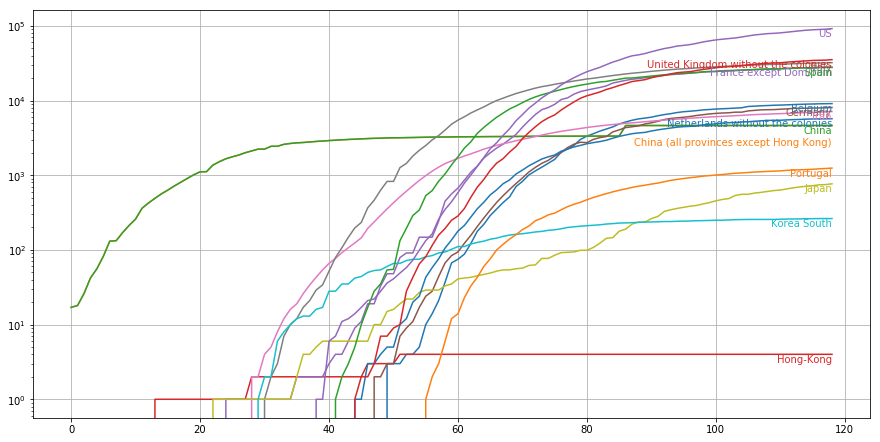

In [18]:

regions = ['Belgium', 'China (all provinces except Hong Kong)', 'China', 'Hong-Kong', 'France except Dom/Tom', 'Germany', 'Iran', 'Italy', 'Japan', 'Korea South', 'Netherlands without the colonies', 'Portugal', 'Spain', 'United Kingdom without the colonies', 'US']
to_plot = {}
for region in regions:
    region_name = region
    # Special cases:
    if "France" in region:
        region_name = "France" 
    if "Netherlands" in region:
        region_name = "Netherlands" 
    if "United Kingdom" in region:
        region_name = "United Kingdom"   
    if "Korea South" in region:
        region_name = "Korea, South"    
    if region == "Hong-Kong":
        d = deaths[deaths["Country/Region"] == "China"][deaths['Province/State'] == "Hong Kong"]
        assert len(d) == 1
    else:
        d = deaths[deaths["Country/Region"] == region_name][deaths['Province/State'].isnull()]
    
    if len(d) == 1:
        to_plot[region] = d.T[4:]
    else:
        # more special cases: China
        if region == "China":
            d = deaths[deaths["Country/Region"] == "China"]
            agg_dict = {col: 'sum' for col in d.columns[4:]}
            to_plot[region] = d.groupby(['Country/Region'],as_index=False).agg(agg_dict).T[1:]

        if region == "China (all provinces except Hong Kong)":
            d = deaths[deaths["Country/Region"] == "China"][deaths['Province/State'] != "Hong Kong"]
            agg_dict = {col: 'sum' for col in d.columns[4:]}
            to_plot[region] = d.groupby(['Country/Region'],as_index=False).agg(agg_dict).T[1:]
            
    to_plot[region].index = pd.to_datetime(to_plot[region].index)
    col_name = to_plot[region].columns[0]
    to_plot[region] = to_plot[region].rename(columns={col_name: "deaths cases"})
    
      
    
assert len(to_plot) == len(regions)

to_plot_cut = {}
# for region, data in to_plot.items():  # something is wrong here!
#     cutpoint = -1    
#     col = data.columns[0]    
#     for i, val in enumerate(data["deaths cases"]):
#         #print(val)
#         if val >= 150:
#             cutpoint = i            
#             break
#     assert cutpoint != -1
#     to_plot_cut[region] = data.iloc[cutpoint:]  
# to_plot_cut

fig = plt.figure(figsize=(15,7.5))
ax = plt.subplot(111)


for region, data in to_plot.items():
    xs = np.arange(0,len(data["deaths cases"]),1)
    ys = data["deaths cases"][:]
    p = ax.plot(xs, ys, label=region)
    annotation_text = region
    if "except Hong Kong" in region:
        annotation_text = "\n"+annotation_text
    ax.annotate(annotation_text, xy=(xs[-1], ys[-1]),  xycoords='data',
            xytext=(xs[-1], ys[-1]), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=-0.05),
            horizontalalignment='right', verticalalignment='top', color = p[0].get_color()
            )

plt.grid()
plt.yscale("log")
plt.show()

### lets focus on france as proposed in the task:

In [19]:
# https://www.insee.fr/fr/statistiques/4487988?sommaire=4487854 :
deaths_france = pd.read_csv('2020-05-15_deces_quotidiens_departement_csv.csv', sep=";")

In [20]:
deaths_france

Date_evenement      Zone  Communes_a_envoi_dematerialise_Deces2020  \
0        01/03/2020    France                                    1625.0   
1        02/03/2020    France                                    3263.0   
2        03/03/2020    France                                    4891.0   
3        04/03/2020    France                                    6571.0   
4        05/03/2020    France                                    8197.0   
5        06/03/2020    France                                    9896.0   
6        07/03/2020    France                                   11435.0   
7        08/03/2020    France                                   13005.0   
8        09/03/2020    France                                   14674.0   
9        10/03/2020    France                                   16328.0   
10       11/03/2020    France                                   18079.0   
11       12/03/2020    France                                   19721.0   
12       13/03/2020    France                                   21366.0   
13       14/03/2020    France                                   22998.0   
14       15/03/2020    France                                   24680.0   
15       16/03/2020    France                                   26494.0   
16       17/03/2020    France                                   28380.0   
17       18/03/2020    France                                   30216.0   
18       19/03/2020    France                                   32163.0   
19       20/03/2020    France                                   34051.0   
20       21/03/2020    France                                   35845.0   
21       22/03/2020    France                                   37689.0   
22       23/03/2020    France                                   39673.0   
23       24/03/2020    France                                   41700.0   
24       25/03/2020    France                                   43845.0   
25       26/03/2020    France                                   46063.0   
26       27/03/2020    France                                   48294.0   
27       28/03/2020    France                                   50599.0   
28       29/03/2020    France                                   52790.0   
29       30/03/2020    France                                   55268.0   
...             ...       ...                                       ...   
9354     02/05/2020  Dept_976                                     186.0   
9355     03/05/2020  Dept_976                                     192.0   
9356     04/05/2020  Dept_976                                     196.0   
9357     05/05/2020  Dept_976                                     199.0   
9358     06/05/2020  Dept_976                                     199.0   
9359     07/05/2020  Dept_976                                     201.0   
9360     08/05/2020  Dept_976                                     202.0   
9361     09/05/2020  Dept_976                                       NaN   
9362     10/05/2020  Dept_976                                       NaN   
9363     11/05/2020  Dept_976                                       NaN   
9364     12/05/2020  Dept_976                                       NaN   
9365     13/05/2020  Dept_976                                       NaN   
9366     14/05/2020  Dept_976                                       NaN   
9367     15/05/2020  Dept_976                                       NaN   
9368     16/05/2020  Dept_976                                       NaN   
9369     17/05/2020  Dept_976                                       NaN   
9370     18/05/2020  Dept_976                                       NaN   
9371     19/05/2020  Dept_976                                       NaN   
9372     20/05/2020  Dept_976                                       NaN   
9373     21/05/2020  Dept_976                                       NaN   
9374     22/05/2020  Dept_976                                       NaN   
9375     23/05/2020  Dept_976 

In [21]:
deaths_france["Date_evenement"] = pd.to_datetime(deaths_france["Date_evenement"], dayfirst=True)
deaths_france = deaths_france[deaths_france["Zone"] == "France"]
deaths_france = deaths_france.set_index("Date_evenement")
deaths_france

Zone  Communes_a_envoi_dematerialise_Deces2020  \
Date_evenement                                                     
2020-03-01      France                                    1625.0   
2020-03-02      France                                    3263.0   
2020-03-03      France                                    4891.0   
2020-03-04      France                                    6571.0   
2020-03-05      France                                    8197.0   
2020-03-06      France                                    9896.0   
2020-03-07      France                                   11435.0   
2020-03-08      France                                   13005.0   
2020-03-09      France                                   14674.0   
2020-03-10      France                                   16328.0   
2020-03-11      France                                   18079.0   
2020-03-12      France                                   19721.0   
2020-03-13      France                                   21366.0   
2020-03-14      France                                   22998.0   
2020-03-15      France                                   24680.0   
2020-03-16      France                                   26494.0   
2020-03-17      France                                   28380.0   
2020-03-18      France                                   30216.0   
2020-03-19      France                                   32163.0   
2020-03-20      France                                   34051.0   
2020-03-21      France                                   35845.0   
2020-03-22      France                                   37689.0   
2020-03-23      France                                   39673.0   
2020-03-24      France                                   41700.0   
2020-03-25      France                                   43845.0   
2020-03-26      France                                   46063.0   
2020-03-27      France                                   48294.0   
2020-03-28      France                                   50599.0   
2020-03-29      France                                   52790.0   
2020-03-30      France                                   55268.0   
...                ...                                       ...   
2020-05-02      France                                  120794.0   
2020-05-03      France                                  122155.0   
2020-05-04      France                                  123581.0   
2020-05-05      France                                  124956.0   
2020-05-06      France                                  126284.0   
2020-05-07      France                                  127529.0   
2020-05-08      France                                  128694.0   
2020-05-09      France                                       NaN   
2020-05-10      France                                       NaN   
2020-05-11      France                                       NaN   
2020-05-12      France                                       NaN   
2020-05-13      France                                       NaN   
2020-05-14      France                                       NaN   
2020-05-15      France                                       NaN   
2020-05-16      France                                       NaN   
2020-05-17      France                                       NaN   
2020-05-18      France                                       NaN   
2020-05-19      France                                       NaN   
2020-05-20      France                                       NaN   
2020-05-21      France                                       NaN   
2020-05-22      France                                       NaN   
2020-05-23      France                                       NaN   
2020-05-24      France                                       NaN   
2020-05-25      France                                       NaN   
2020-05-26      France                                       NaN   
2020-05-27      France                                       NaN   
2020-0

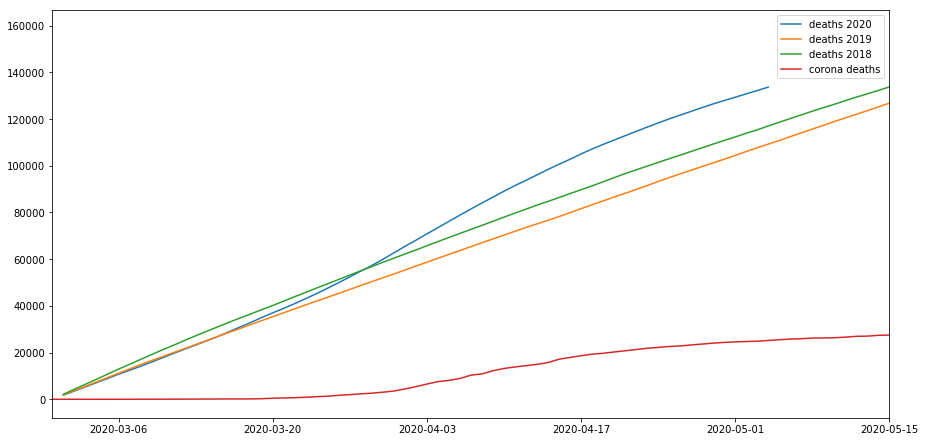

In [22]:
plt.figure(figsize = (15,7.5))
plt.plot(deaths_france["Total_deces_2020"], label="deaths 2020")
plt.plot(deaths_france["Total_deces_2019"], label="deaths 2019")
plt.plot(deaths_france["Total_deces_2018"], label="deaths 2018")

plt.plot(to_plot["France except Dom/Tom"]["deaths cases"], label="corona deaths")
plt.legend()
plt.xlim([datetime.date(2020, 2, 29), datetime.date(2020, 5, 15)])
plt.show()

Those are the cumulative deathnumbers. How does the daily death numbers develop?

In [23]:
#for simplicity we put all in one:
deaths_france["corona deaths"] = to_plot["France except Dom/Tom"]["deaths cases"]
# plt.figure(figsize = (15,7.5))
# plt.plot(deaths_france["Total_deces_2020"], label="deaths 2020")
# plt.plot(deaths_france["Total_deces_2019"], label="deaths 2019")
# plt.plot(deaths_france["Total_deces_2018"], label="deaths 2018")
# plt.plot(deaths_france["corona deaths"], label="corona deaths")


deaths_france
for k in ["Total_deces_2020", "Total_deces_2019", "Total_deces_2018", "corona deaths"]:
    col = 'daily ' + k
    deaths_france[col] = np.zeros(len(deaths_france))
    i = 0
    for row1, row2 in zip(deaths_france[k].iloc[:-1], deaths_france[k].iloc[1:]):
        #print(row1, row2)
        deaths_france[col].iloc[i] = row2-row1
        i += 1


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


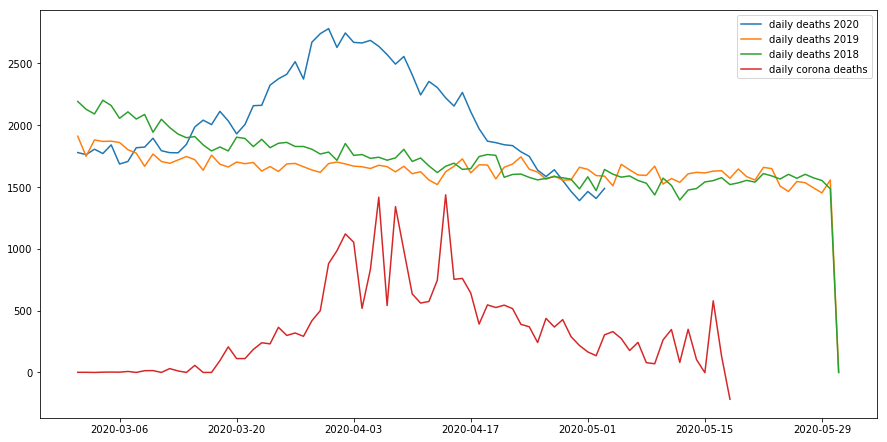

In [24]:
plt.figure(figsize = (15,7.5))
plt.plot(deaths_france["daily Total_deces_2020"], label="daily deaths 2020")
plt.plot(deaths_france["daily Total_deces_2019"], label="daily deaths 2019")
plt.plot(deaths_france["daily Total_deces_2018"], label="daily deaths 2018")
plt.plot(deaths_france["daily corona deaths"], label="daily corona deaths")
plt.legend()
plt.show()

We see that there are more deaths but they are not all registered as corona deaths!